<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Static:-Utility-maximization" data-toc-modified-id="Static:-Utility-maximization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Static: Utility maximization</a></span></li><li><span><a href="#Interactive:-Cobb-Douglas" data-toc-modified-id="Interactive:-Cobb-Douglas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Interactive: Cobb-Douglas</a></span></li><li><span><a href="#Interactive:-Constant-Elasticity-of-Substitution-(CES)" data-toc-modified-id="Interactive:-Constant-Elasticity-of-Substitution-(CES)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Interactive: Constant Elasticity of Substitution (CES)</a></span></li><li><span><a href="#Interactive:-Perfect-substitutes" data-toc-modified-id="Interactive:-Perfect-substitutes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Interactive: Perfect substitutes</a></span></li><li><span><a href="#Interactive:-Perfect-complements" data-toc-modified-id="Interactive:-Perfect-complements-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Interactive: Perfect complements</a></span></li><li><span><a href="#Interactive:-Quasi-linear-(log)" data-toc-modified-id="Interactive:-Quasi-linear-(log)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Interactive: Quasi-linear (log)</a></span></li><li><span><a href="#Interactive:-Quasi-linear-(sqrt)" data-toc-modified-id="Interactive:-Quasi-linear-(sqrt)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Interactive: Quasi-linear (sqrt)</a></span></li><li><span><a href="#Interactive:-Concave" data-toc-modified-id="Interactive:-Concave-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Interactive: Concave</a></span></li><li><span><a href="#Interactive:-Quasi-quasi-linear" data-toc-modified-id="Interactive:-Quasi-quasi-linear-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Interactive: Quasi-quasi-linear</a></span></li><li><span><a href="#Interactive:-Saturated" data-toc-modified-id="Interactive:-Saturated-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Interactive: Saturated</a></span></li></ul></div>

In [1]:
# setup
%matplotlib inline
%load_ext autoreload
%autoreload 1

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

import seaborn as sns
sns.set_style("whitegrid")
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

import ipywidgets as widgets

import numecon.micro.consumption as consumption
%aimport numecon.micro.consumption

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:5000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

# Static: Utility maximization

The consumer problem is 

$$ V(p_1,p_2,I) = \max_{x_1,x_2} u(x_1,x_2) \,\,\,\text{s.t.}\,\,\, x_1,x_2 \in C(p_1,p_2,I) $$

where the budgetset is

$$C(p_1,p_2,I) = \{(x_1,x_2) \in \mathbb{R}_{+}^2 \,\, | \,\, p_1 x_1 + p_2 x_2 \leq I\} $$

Text(3.605,3.605,'$u^{max} = 1.28$')

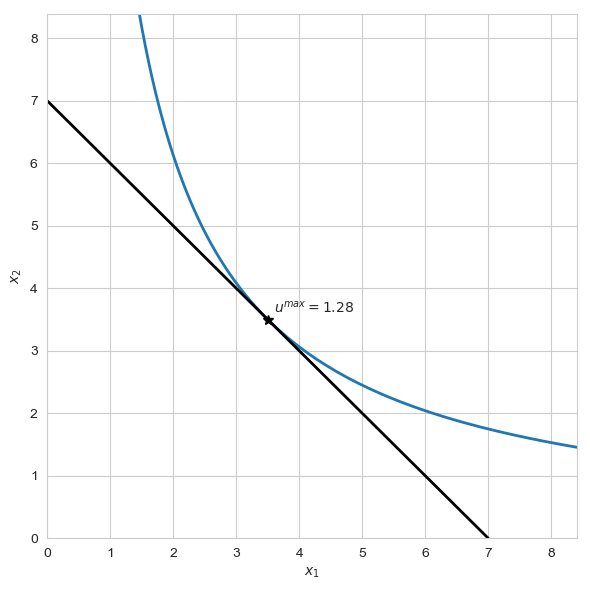

In [3]:
# code

consumer = consumption.ConsumerClass(preferences='cobb_douglas',alpha=0.1,beta=0.1,p1=1,p2=1,I=7)
fig,ax = consumer.figure()

# a. calculations
consumer.maximize_utility()

# c. plots
consumer.plot_indifference_curves(ax,[consumer.u_ast])
consumer.plot_max(ax)
consumer.plot_budgetline(ax)
ax.text(consumer.x1_ast*1.03,consumer.x2_ast*1.03,f'$u^{{max}} = {consumer.u_ast:.2f}$')

In [4]:
print(f'analytical: x = [{consumer.x1_ast:.16f},{consumer.x1_ast:.16f}]')
consumer.maximize_utility(numerical=True)
print(f' numerical: x = [{consumer.x1_ast:.16f},{consumer.x1_ast:.16f}] (assuming monotonicity)')
consumer.maximize_utility(numerical=True,monotone=False)
print(f' numerical: x = [{consumer.x1_ast:.16f},{consumer.x1_ast:.16f}]')

analytical: x = [3.5000000000000000,3.5000000000000000]
 numerical: x = [3.4999999999999996,3.4999999999999996] (assuming monotonicity)
 numerical: x = [3.5000000000000000,3.5000000000000000]


# Interactive: Cobb-Douglas

Let $\gamma \in [0,1]$ denote a guess on the optimal budget share for $x_1$ implying

$$ x_1^{\gamma} = \gamma \frac{I}{p_1} $$

and

$$ x_2^{\gamma} = \frac{I - \gamma I/p_1}{p_2} $$

In [5]:
consumption.interactive_utility_max(preferences='cobb_douglas')

interactive(children=(FloatSlider(value=1.0, description='$p_1$', max=4.0, min=0.05, step=0.05), FloatSlider(v…

# Interactive: Constant Elasticity of Substitution (CES)

$$u(x_1,x_2) = (\alpha x_1^{-\beta}+(1-\alpha)x_2^{-\beta})^{-1/\beta}$$

In [6]:
consumption.interactive_utility_max(preferences='ces')

interactive(children=(FloatSlider(value=1.0, description='$p_1$', max=4.0, min=0.05, step=0.05), FloatSlider(v…

# Interactive: Perfect substitutes

$$u(x_1,x_2) = \alpha x_1 + \beta x_2$$

In [7]:
consumption.interactive_utility_max(preferences='perfect_substitutes',p1=1.5)

interactive(children=(FloatSlider(value=1.5, description='$p_1$', max=4.0, min=0.05, step=0.05), FloatSlider(v…

# Interactive: Perfect complements

$$u(x_1,x_2) = \min{\{\alpha x_1 + \beta x_2}\}$$

In [8]:
consumption.interactive_utility_max(preferences='perfect_complements')

interactive(children=(FloatSlider(value=1.0, description='$p_1$', max=4.0, min=0.05, step=0.05), FloatSlider(v…

# Interactive: Quasi-linear (log)

$$u(x_1,x_2) = \alpha\log(x_1) + \beta x_2$$

In [9]:
consumption.interactive_utility_max(preferences='quasi_log')

interactive(children=(FloatSlider(value=1.0, description='$p_1$', max=4.0, min=0.05, step=0.05), FloatSlider(v…

# Interactive: Quasi-linear (sqrt)

$$u(x_1,x_2) = \alpha\sqrt{x_1} + \beta x_2$$

In [10]:
consumption.interactive_utility_max(preferences='quasi_sqrt')

interactive(children=(FloatSlider(value=1.0, description='$p_1$', max=4.0, min=0.05, step=0.05), FloatSlider(v…

# Interactive: Concave

$$ u(x_1,x_2) = \alpha x_1^2 + \beta x_2^2 $$

In [11]:
consumption.interactive_utility_max(preferences='concave',p1=1.5)

interactive(children=(FloatSlider(value=1.5, description='$p_1$', max=4.0, min=0.05, step=0.05), FloatSlider(v…

# Interactive: Quasi-quasi-linear

$$ u(x_1,x_2) = x_1^{\alpha} (x_2 + \beta) $$

In [12]:
consumption.interactive_utility_max(preferences='quasi_quasi')

interactive(children=(FloatSlider(value=1.0, description='$p_1$', max=4.0, min=0.05, step=0.05), FloatSlider(v…

# Interactive: Saturated

$$ u(x_1,x_2) = -(x_1-\alpha)^2 - (x_2-\beta)^2 $$

In [13]:
consumption.interactive_utility_max(preferences='saturated')

interactive(children=(FloatSlider(value=1.0, description='$p_1$', max=4.0, min=0.05, step=0.05), FloatSlider(v…